# **Mining IMDb for Movie Trends — Data Preprocessing and Initial Exploration**

In [1]:
#Importing Required Libraries

import os
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# Download the IMDb dataset from Kaggle

path = kagglehub.dataset_download("vivekananda99/imdb-dataset")
print("Dataset downloaded to:", path)

100%|██████████| 1.71G/1.71G [00:18<00:00, 97.7MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/vivekananda99/imdb-dataset/versions/1


In [3]:
def read_limited_tsv(file_name, n=10000):
    file_path = os.path.join(path, file_name)
    try:
        return pd.read_csv(file_path, sep="\t",na_values="\\N", low_memory=False, nrows=n)  # read dataset
    except pd.errors.EmptyDataError:
        print(f"{file_name} is empty or unreadable.")
        return pd.DataFrame()

In [4]:
# Loading the IMDb Files

title_basics = read_limited_tsv("title.basics.tsv")
title_ratings = read_limited_tsv("title.ratings.tsv")
title_principals = read_limited_tsv("title.principals.tsv")
name_basics = read_limited_tsv("name.basics.tsv")
title_akas = read_limited_tsv("title.akas.tsv")
title_crew = read_limited_tsv("title.crew.tsv")
title_episodes = read_limited_tsv("title.episode.tsv")

In [5]:
# check for how many rows were actually read

for name, df in [
    ("title_basics", title_basics),
    ("title_ratings", title_ratings),
    ("title_principals", title_principals),
    ("name_basics", name_basics),
    ("title_akas", title_akas),
    ("title_crew", title_crew),
    ("title_episodes", title_episodes)
]:
    print(f"{name}: {len(df)} rows loaded")

title_basics: 10000 rows loaded
title_ratings: 10000 rows loaded
title_principals: 10000 rows loaded
name_basics: 10000 rows loaded
title_akas: 10000 rows loaded
title_crew: 10000 rows loaded
title_episodes: 10000 rows loaded


In [6]:
def overview(df, name):
    print(f"\n{name}: shape={df.shape}")
    print("-"*40)
    print(df.info())  # dataset info
    print("-"*40)
    print(df.head(2))  # display top rows
    print("-"*40)
    print(df.isnull().sum().sort_values(ascending=False))  # check missing values
    print("-"*40)
    print(df.columns)

In [7]:
overview(title_basics, "title.basics")


title.basics: shape=(10000, 9)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          10000 non-null  object 
 1   titleType       10000 non-null  object 
 2   primaryTitle    10000 non-null  object 
 3   originalTitle   10000 non-null  object 
 4   isAdult         10000 non-null  int64  
 5   startYear       9999 non-null   float64
 6   endYear         0 non-null      float64
 7   runtimeMinutes  5125 non-null   float64
 8   genres          9455 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 703.3+ KB
None
----------------------------------------
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chi

In [8]:
overview(title_ratings, "title.ratings")


title.ratings: shape=(10000, 3)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         10000 non-null  object 
 1   averageRating  10000 non-null  float64
 2   numVotes       10000 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB
None
----------------------------------------
      tconst  averageRating  numVotes
0  tt0000001            5.7      2183
1  tt0000002            5.5       302
----------------------------------------
tconst           0
averageRating    0
numVotes         0
dtype: int64
----------------------------------------
Index(['tconst', 'averageRating', 'numVotes'], dtype='object')


In [9]:
datasets = [title_basics, title_ratings, title_principals, name_basics, title_akas, title_crew, title_episodes]
dataset_names = ['title_basics', 'title_ratings', 'title_principals', 'name_basics', 'title_akas', 'title_crew', 'title_episodes']

for name, data in zip(dataset_names, datasets):
    print(f"{name}:\n{data.isnull().sum()}\n{'-'*40}")  # check missing values

title_basics:
tconst                0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear             1
endYear           10000
runtimeMinutes     4875
genres              545
dtype: int64
----------------------------------------
title_ratings:
tconst           0
averageRating    0
numVotes         0
dtype: int64
----------------------------------------
title_principals:
tconst           0
ordering         0
nconst           0
category         0
job           8787
characters    5498
dtype: int64
----------------------------------------
name_basics:
nconst                  0
primaryName             0
birthYear            3885
deathYear            7703
primaryProfession      64
knownForTitles         52
dtype: int64
----------------------------------------
title_akas:
titleId               0
ordering              0
title                 0
region             3373
language           9564
types              1121
attributes         9576
i

In [10]:
for name, data in zip(dataset_names, datasets):
    print(f"{name}: {data.duplicated().sum()} duplicate rows")

title_basics: 0 duplicate rows
title_ratings: 0 duplicate rows
title_principals: 0 duplicate rows
name_basics: 0 duplicate rows
title_akas: 0 duplicate rows
title_crew: 0 duplicate rows
title_episodes: 0 duplicate rows


In [11]:
# Copy to avoid modifying original data
basics = title_basics.copy()
ratings = title_ratings.copy()

In [12]:
print("Missing values before cleaning:\n")
print(basics.isnull().sum(), "\n")  # check missing values
print(ratings.isnull().sum())  # check missing values

Missing values before cleaning:

tconst                0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear             1
endYear           10000
runtimeMinutes     4875
genres              545
dtype: int64 

tconst           0
averageRating    0
numVotes         0
dtype: int64


No missing values in ratings

In [13]:
# Convert numeric columns to proper types
basics["startYear"] = pd.to_numeric(basics["startYear"], errors="coerce")
basics["endYear"] = pd.to_numeric(basics["endYear"], errors="coerce")
basics["runtimeMinutes"] = pd.to_numeric(basics["runtimeMinutes"], errors="coerce")

basics["startYear"].fillna(basics["startYear"].median(), inplace=True)  # handle missing data

basics["endYear"].fillna(basics["startYear"], inplace=True)  # handle missing data

basics["runtimeMinutes"].fillna(basics["runtimeMinutes"].median(), inplace=True)  # handle missing data

basics["genres"].fillna("Unknown", inplace=True)  # handle missing data

basics.isnull().sum()  # check missing values

/tmp/ipython-input-3956680009.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  basics["startYear"].fillna(basics["startYear"].median(), inplace=True)  # handle missing data
/tmp/ipython-input-3956680009.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

,0
tconst,0
titleType,0
primaryTitle,0
originalTitle,0
isAdult,0
startYear,0
endYear,0
runtimeMinutes,0
genres,0


In [14]:
# Drop duplicates
basics.drop_duplicates(subset=["tconst"], inplace=True)  # drop unnecessary columns
ratings.drop_duplicates(subset=["tconst"], inplace=True)  # drop unnecessary columns

In [15]:
# Verify cleaning
print("\nAfter Cleaning:")
print("title_basics shape:", basics.shape)
print("title_ratings shape:", ratings.shape)


After Cleaning:
title_basics shape: (10000, 9)
title_ratings shape: (10000, 3)


In [16]:
# Split 'genres' column into list format
basics["genres"] = basics["genres"].fillna("Unknown").apply(lambda x: x.split(",") if x != "Unknown" else ["Unknown"])  # handle missing data

for col in ["startYear", "endYear"]:
    basics[col] = pd.to_numeric(basics[col], errors="coerce")

basics["startYear"].fillna(basics["startYear"].median(), inplace=True)  # handle missing data

basics_filtered = basics[basics["titleType"].isin(["movie", "tvSeries"])]

print("After transformation:")
display(basics_filtered.head(3))  # display top rows

After transformation:


/tmp/ipython-input-1558744394.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  basics["startYear"].fillna(basics["startYear"].median(), inplace=True)  # handle missing data


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,1894.0,45.0,[Romance]
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,1897.0,100.0,"[Documentary, News, Sport]"
331,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900.0,1900.0,40.0,"[Biography, Drama]"


In [17]:
# Merge on 'tconst'
merged = pd.merge(basics_filtered, ratings, on="tconst", how="inner")

print("Merged dataset shape:", merged.shape)
print("Columns:", merged.columns.tolist())
merged.head(3)  # display top rows

Merged dataset shape: (1302, 11)
Columns: ['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes']


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,1894.0,45.0,[Romance],5.3,230
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,1897.0,100.0,"[Documentary, News, Sport]",5.3,574
2,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900.0,1900.0,40.0,"[Biography, Drama]",5.5,62


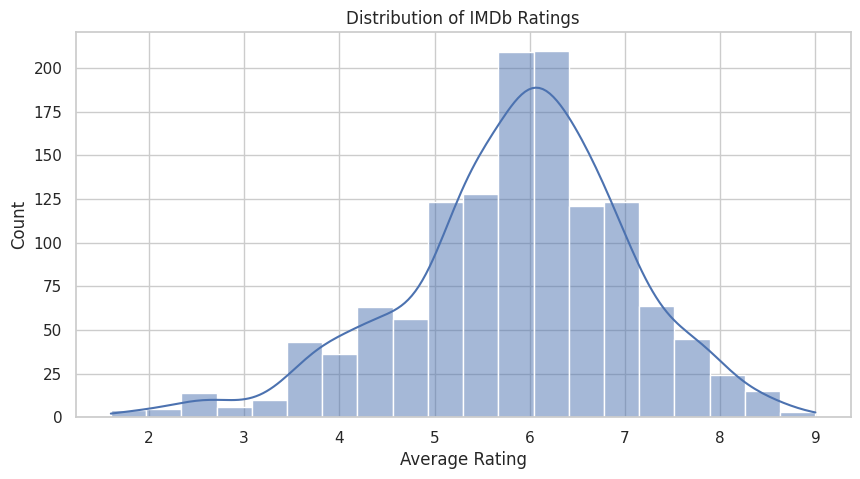

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(merged["averageRating"], bins=20, kde=True)
plt.title("Distribution of IMDb Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.show()

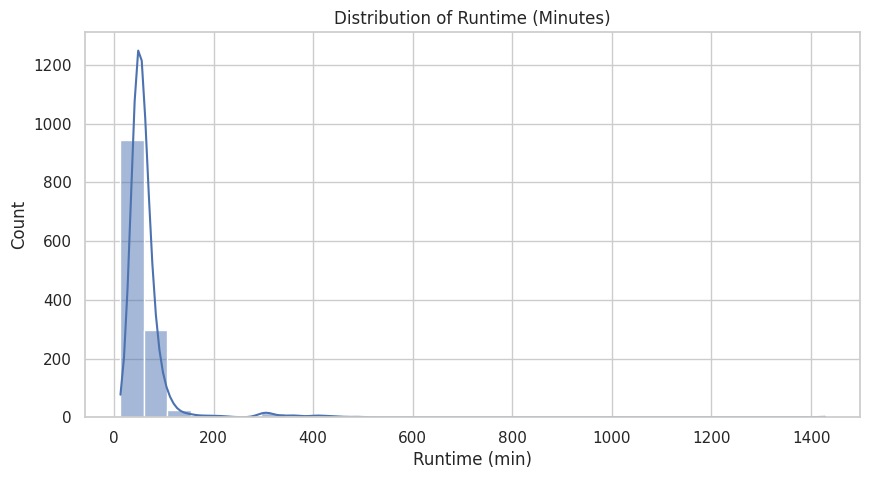

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(merged["runtimeMinutes"], bins=30, kde=True)
plt.title("Distribution of Runtime (Minutes)")
plt.xlabel("Runtime (min)")
plt.ylabel("Count")
plt.show()

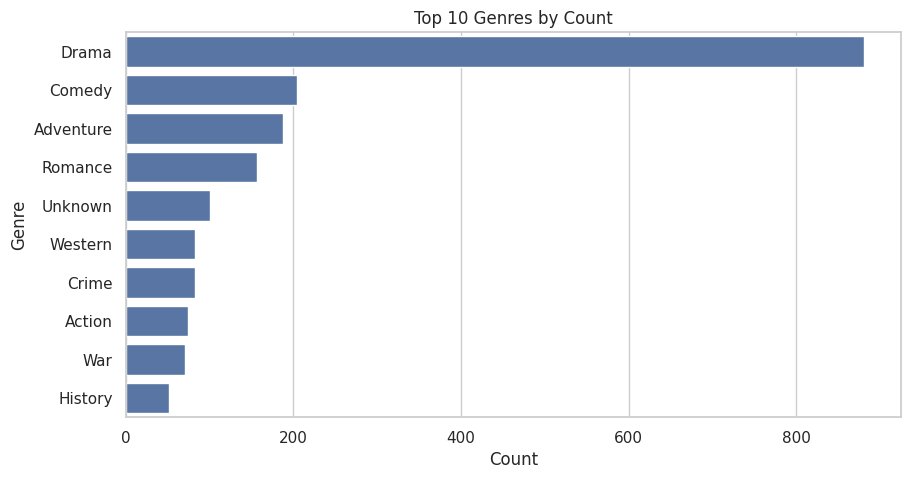

In [21]:
genre_exploded = merged.explode("genres").reset_index(drop=True)

# Top 10 genres by count
plt.figure(figsize=(10,5))
sns.countplot(data=genre_exploded, y="genres", order=genre_exploded["genres"].value_counts().iloc[:10].index)
plt.title("Top 10 Genres by Count")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

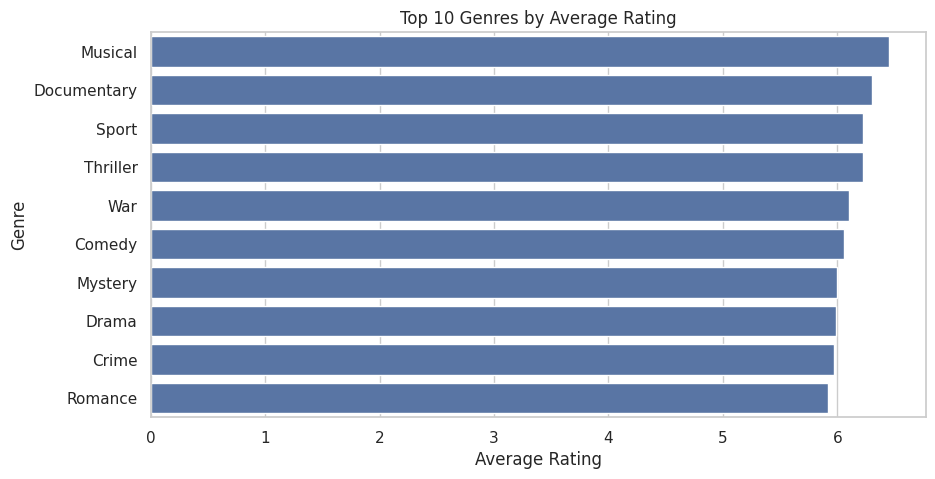

In [22]:
# Average rating by genre
genre_rating = genre_exploded.groupby("genres")["averageRating"].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(x=genre_rating.values, y=genre_rating.index)
plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()

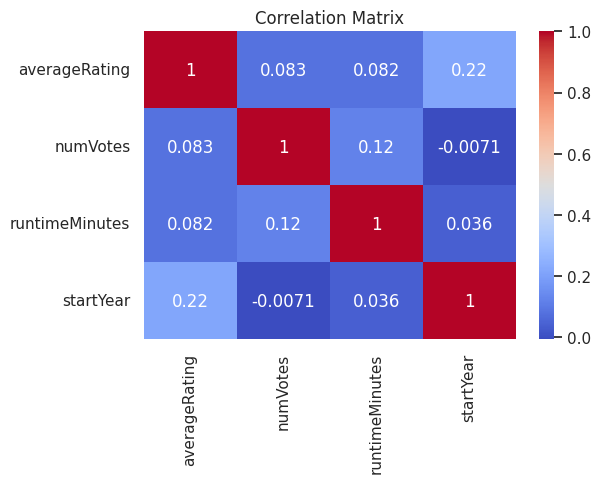


Descriptive Statistics:
       averageRating      numVotes  runtimeMinutes
count    1302.000000   1302.000000     1302.000000
mean        5.863825    176.877880       64.758065
std         1.181580   1037.671484       60.513831
min         1.600000      7.000000       13.000000
25%         5.300000     19.000000       43.000000
50%         6.000000     28.000000       50.000000
75%         6.600000     58.750000       64.000000
max         9.000000  27856.000000     1428.000000


In [23]:
corr = merged[["averageRating", "numVotes", "runtimeMinutes", "startYear"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")  # encode categorical data
plt.title("Correlation Matrix")
plt.show()

print("\nDescriptive Statistics:")
print(merged[["averageRating", "numVotes", "runtimeMinutes"]].describe())  # summary statistics